In [1]:
using Pkg
using CSV
using Random
using LinearAlgebra
using Plots
using DataFrames
using DelimitedFiles
using Tables
using Statistics
using MarketData
using Dates

# problem1

In [ ]:
stockdata = readdlm("D:\\OneDrive - g.ntu.edu.tw\\110\\商管機器學習\\Assignment 5\\stock_data.csv", ',')
for i in 2:length(stockdata[:,1])
    stockdata[i,1]=Date(stockdata[i,1], dateformat"y/m/d")
end
CSV.write("D:\\OneDrive - g.ntu.edu.tw\\110\\商管機器學習\\Assignment 5\\stock_data.csv", 
    Tables.table(stockdata), 
    writeheader = false)

In [445]:
df=DataFrame(CSV.File("D:\\OneDrive - g.ntu.edu.tw\\110\\商管機器學習\\Assignment 5\\stock_data.csv"))

,Date,AAPL,TSLA,AMZN,TSM,INTC,AMD,NVDA,GOOGL
,Date,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2015-12-31,26.315,48.002,675.89,22.75,34.45,2.87,8.24,778.01
2,2016-01-04,26.3375,44.682,636.99,22.09,33.99,2.77,8.0925,759.44
3,2016-01-05,25.6775,44.686,633.79,21.95,33.83,2.75,8.2225,761.53
4,2016-01-06,25.175,43.808,632.65,21.34,33.08,2.51,7.8825,759.33
5,2016-01-07,24.1125,43.13,607.94,21.1,31.84,2.28,7.57,741.0
6,2016-01-08,24.24,42.2,607.05,20.81,31.51,2.14,7.4075,730.91
7,2016-01-11,24.6325,41.57,617.74,20.93,32.06,2.34,7.42,733.07
8,2016-01-12,24.99,41.994,617.89,20.75,32.68,2.39,7.545,745.34
9,2016-01-13,24.3475,40.062,581.81,20.48,31.91,2.25,7.315,719.57


In [446]:
filter(:Date => ==(Date("2016-02-12")), df)

,Date,AAPL,TSLA,AMZN,TSM,INTC,AMD,NVDA,GOOGL
,Date,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2016-02-12,23.4975,30.208,507.08,22.24,28.64,1.83,6.4325,706.89


(1)

In [447]:
function Daily_return(x)
    return(filter(:Date => ==(Date(x)), df))
end

Daily_return (generic function with 1 method)

In [461]:
function Stock_info(t,t_end)
    subdf=df[(df[:,:Date].>=Date(t)),:]
    subdf=subdf[(subdf[:,:Date].<=Date(t_end)),:]
    subdf=subdf[!, Not(r"Date")]
    n=names(subdf)
    df1=Matrix(subdf)
    r=0
    cov=[]
    for i in 1:length(df1[:,1])
        if i == 1
            continue
        end
        r=r.+((df1[i,:].-df1[i-1,:])./df1[i-1,:])
        cov=vcat(cov,[((df1[i,:].-df1[i-1,:])./df1[i-1,:])])
    end
    v = collect(Iterators.flatten(cov))
    N=length(cov)
    r=r/N*N
    cov=reshape(v,length(subdf[1,:]),length(cov))
    m=mean(eachcol(cov))
    for i in 1:10
        cov[i,:]=cov[i,:].-m[i]
    end
    cov=cov*cov'/N*N
    #cov=hcat(n,cov)
    a=["NA" "AAPL" "TSLA" "AMZN" "TSM" "INTC" "AMD" "NVDA" "GOOGL" "NFLX" "FB"]
    #cov=vcat(a,cov)
    return(r,cov,n)
end

Stock_info (generic function with 1 method)

In [460]:
hcat(Stock_info("2016-01-01","2020-12-31")[3],Stock_info("2016-01-01","2020-12-31")[1])

10×2 Matrix{Any}:
 "AAPL"   1.8536
 "TSLA"   3.57785
 "AMZN"   1.86999
 "TSM"    1.8109
 "INTC"   0.638804
 "AMD"    4.53234
 "NVDA"   3.34971
 "GOOGL"  1.00068
 "NFLX"   1.97258
 "FB"     1.2512

In [464]:
vcat(["NA" "AAPL" "TSLA" "AMZN" "TSM" "INTC" "AMD" "NVDA" "GOOGL" "NFLX" "FB"],
    hcat(Stock_info("2016-01-01","2020-12-31")[3],Stock_info("2016-01-01","2020-12-31")[2]))

11×11 Matrix{Any}:
 "NA"      "AAPL"    "TSLA"    "AMZN"   …   "GOOGL"   "NFLX"    "FB"
 "AAPL"   0.454896  0.335507  0.272434     0.260051  0.278222  0.288428
 "TSLA"   0.335507  1.66544   0.318511     0.275652  0.39115   0.307669
 "AMZN"   0.272434  0.318511  0.458424     0.264224  0.355886  0.310528
 "TSM"    0.254562  0.289696  0.204096     0.209334  0.221782  0.203897
 "INTC"   0.282461  0.301399  0.228824  …  0.246755  0.266725  0.246555
 "AMD"    0.390559  0.535697  0.373286     0.289991  0.442803  0.326498
 "NVDA"   0.399931  0.506224  0.371562     0.349744  0.417969  0.381259
 "GOOGL"  0.260051  0.275652  0.264224     0.345953  0.271593  0.299994
 "NFLX"   0.278222  0.39115   0.355886     0.271593  0.82012   0.311108
 "FB"     0.288428  0.307669  0.310528  …  0.299994  0.311108  0.541353

In [465]:
hcat(Stock_info("2018-01-01","2020-12-31")[3],Stock_info("2018-01-01","2020-12-31")[1])

10×2 Matrix{Any}:
 "AAPL"   1.31875
 "TSLA"   3.08105
 "AMZN"   1.18205
 "TSM"    1.14893
 "INTC"   0.277455
 "AMD"    2.6532
 "NVDA"   1.34641
 "GOOGL"  0.622969
 "NFLX"   1.23163
 "FB"     0.623601

In [466]:
vcat(["NA" "AAPL" "TSLA" "AMZN" "TSM" "INTC" "AMD" "NVDA" "GOOGL" "NFLX" "FB"],
    hcat(Stock_info("2018-01-01","2020-12-31")[3],Stock_info("2018-01-01","2020-12-31")[2]))

11×11 Matrix{Any}:
 "NA"      "AAPL"    "TSLA"    "AMZN"   …   "GOOGL"   "NFLX"    "FB"
 "AAPL"   0.368929  0.294997  0.228774     0.22359   0.227776  0.247913
 "TSLA"   0.294997  1.39257   0.265832     0.238866  0.313511  0.2578
 "AMZN"   0.228774  0.265832  0.329954     0.208338  0.284408  0.238848
 "TSM"    0.213184  0.248016  0.170532     0.174446  0.17106   0.170609
 "INTC"   0.247817  0.270024  0.189534  …  0.2154    0.223393  0.211507
 "AMD"    0.321854  0.408334  0.317944     0.268511  0.346807  0.280767
 "NVDA"   0.344671  0.419884  0.314034     0.302776  0.340952  0.328732
 "GOOGL"  0.22359   0.238866  0.208338     0.282592  0.213615  0.24542
 "NFLX"   0.227776  0.313511  0.284408     0.213615  0.54406   0.24571
 "FB"     0.247913  0.2578    0.238848  …  0.24542   0.24571   0.432139

(2)

In [482]:
function port_opt(rho,mu,sigma)
    T, n = size(sigma)
    KKT = [ 2*sigma'*sigma ones(n) mu; ones(n)' 0 0; mu' 0 0]
    wz1z2 = KKT \ [2*rho*T*mu; 1; rho]
    w = wz1z2[1:n]
    return w
end

port_opt (generic function with 2 methods)

In [516]:
weight=zeros(10,0)
for i in[0.5,0.8,1.1,1.4,1.7]
    weight=hcat(weight,port_opt(i,Stock_info("2020-01-01","2020-12-31")[1],
            Stock_info("2020-01-01","2020-12-31")[2])) 
end

In [501]:
vcat(["NA" "50%" "80%" "110%" "140%" "170%" ],
    hcat([ "AAPL","TSLA", "AMZN", "TSM", "INTC", "AMD", "NVDA", "GOOGL", "NFLX", "FB"],
        weight))

11×6 Matrix{Any}:
 "NA"       "50%"       "80%"       "110%"      "140%"      "170%"
 "AAPL"    0.383223    0.610968    0.838713    1.06646     1.2942
 "TSLA"   -0.0728748  -0.0806591  -0.0884434  -0.0962277  -0.104012
 "AMZN"    1.31786     1.60701     1.89616     2.1853      2.47445
 "TSM"     0.498034    0.592783    0.687531    0.78228     0.877029
 "INTC"   -0.571009   -0.755918   -0.940826   -1.12573    -1.31064
 "AMD"    -0.331782   -0.525568   -0.719354   -0.913141   -1.10693
 "NVDA"   -0.584692   -0.343282   -0.101872    0.139538    0.380949
 "GOOGL"   1.93356     1.76643     1.59931     1.43218     1.26506
 "NFLX"    0.0187627  -0.0230919  -0.0649464  -0.106801   -0.148656
 "FB"     -1.59108    -1.84867    -2.10627    -2.36386    -2.62145

(3)

In [504]:
function return_mat(t,t_end)
    subdf=df[(df[:,:Date].>=Date(t)),:]
    subdf=subdf[(subdf[:,:Date].<=Date(t_end)),:]
    subdf=subdf[!, Not(r"Date")]
    n=names(subdf)
    df1=Matrix(subdf)
    return df1
end

return_mat (generic function with 1 method)

In [505]:
return_mat("2020-01-01","2020-12-31")

252×10 Matrix{Float64}:
  75.0875   86.052  1898.01   60.04  …   59.9775  1368.68  329.81  209.78
  74.3575   88.602  1874.97   58.06      59.0175  1361.52  325.9   208.67
  74.95     90.308  1902.88   57.39      59.265   1397.81  335.83  212.6
  74.5975   93.812  1906.86   58.32      59.9825  1395.11  330.75  213.06
  75.7975   98.428  1891.97   58.75      60.095   1405.04  339.26  215.22
  77.4075   96.268  1901.05   59.23  …   60.755   1419.79  335.66  218.3
  77.5825   95.63   1883.16   58.86      61.08    1428.96  329.05  218.06
  79.24    104.972  1891.3    60.06      62.995   1440.03  338.92  221.91
  78.17    107.584  1869.44   60.32      61.82    1430.59  338.69  219.06
  77.835   103.7    1862.02   58.39      61.3925  1439.2   339.07  221.15
  78.81    102.698  1877.94   58.75  …   62.2325  1450.16  338.62  221.77
  79.6825  102.1    1864.72   58.58      62.32    1479.52  339.67  222.14
  79.1425  109.44   1892.0    58.24      61.985   1482.25  338.11  221.44
   ⋮            

In [409]:
function levenberg_marquardt2(f, Df, x1, lambda1, kmax=100, tol=1e-6)
    n = length(x1)
    x = x1
    lambda = lambda1
    objectives = zeros(0,1)
    residuals = zeros(0,1)
    for k = 1:kmax
        fk = f(x)
        Dfk = Df(x)
        objectives = [objectives; norm(fk)^2]
        residuals = [residuals; norm(2*Dfk'*fk)]
        if norm(2*Dfk'*fk) < tol
            break
        end;
        xt = x - inv(Dfk'*Dfk+lambda*Matrix{Float64}(I, n, n))*Dfk'*fk
        if norm(f(xt)) < norm(fk)
            lambda = 0.8*lambda
            x = xt
        else
            lambda = 2.0*lambda
        end
    end
    return x, Dict([ ("objectives", objectives),("residuals", residuals)])
end

levenberg_marquardt2 (generic function with 3 methods)

(4)

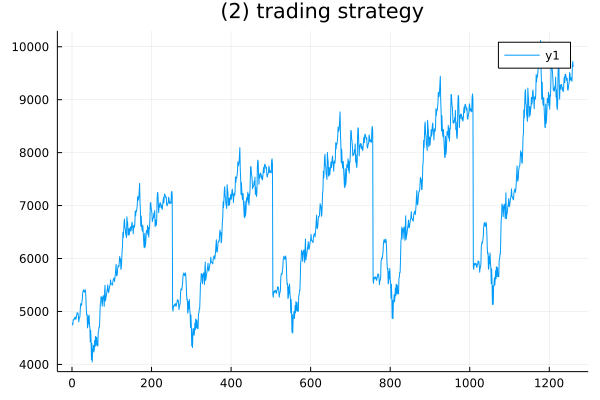

In [515]:
r2021=return_mat("2020-01-01","2020-12-31")*
port_opt(0.5,Stock_info("2020-01-01","2020-12-31")[1],Stock_info("2020-01-01","2020-12-31")[2])
r2022=return_mat("2020-01-01","2020-12-31")*
port_opt(0.8,Stock_info("2020-01-01","2020-12-31")[1],Stock_info("2020-01-01","2020-12-31")[2])
r2023=return_mat("2020-01-01","2020-12-31")*
port_opt(1.1,Stock_info("2020-01-01","2020-12-31")[1],Stock_info("2020-01-01","2020-12-31")[2])
r2024=return_mat("2020-01-01","2020-12-31")*
port_opt(1.4,Stock_info("2020-01-01","2020-12-31")[1],Stock_info("2020-01-01","2020-12-31")[2])
r2025=return_mat("2020-01-01","2020-12-31")*
port_opt(1.7,Stock_info("2020-01-01","2020-12-31")[1],Stock_info("2020-01-01","2020-12-31")[2])
plot(vcat(r2021,r2022,r2023,r2024,r2025),title="(2) trading strategy")

# problem2

In [402]:
aa = readdlm("D:\\OneDrive - g.ntu.edu.tw\\110\\商管機器學習\\Assignment 5\\orbit.csv", 
    ',')

17×4 Matrix{Any}:
 "Asteroid Name"    "X"    "Y"   "Mass"
 "M1001"           1.59   0.27  0.73
 "M1002"           2.74   1.14  0.98
 "M1003"           0.61   0.02  0.88
 "M1004"          -0.29   0.98  1.78
 "M1005"           0.14   1.39  2.31
 "M1006"           0.44   0.05  0.16
 "M1007"          -0.03   0.03  0.07
 "M1008"           2.55   1.63  0.25
 "M1009"           0.76   1.49  0.34
 "M1010"           2.27   1.87  0.41
 "M1011"           1.79   1.8   1.53
 "M1012"          -0.68   0.42  0.22
 "M1013"           2.41   0.83  1.17
 "M1014"           0.08  -0.02  0.43
 "M1015"           0.53   1.45  0.64
 "Moon"            1.25   0.9   8

In [410]:
Random.seed!(8)
x = randn(100)
y = randn(100)

100-element Vector{Float64}:
  2.125313426593699
  0.7612677775756624
  1.7604956260828402
  0.4102241117684059
 -1.130724398061997
  0.09253108903323658
  1.9818245647685322
 -0.5401137576273252
  1.9018521422390415
 -0.831568786951868
 -0.24811713551449074
  0.08080363380959577
  0.10164337902297127
  ⋮
 -0.141164395549537
 -1.2695486858030989
  0.33946104954852907
 -0.9536465822207352
  2.244949920928502
 -0.17470900444692558
 -0.24016764642801655
 -0.40163569867043214
  0.18155949212409256
 -1.1316533571911258
  0.6037315209568778
  0.009199346173422995

(a)

In [441]:
t= atan.(x./y)
f(theta)=
norm.(theta[1].+theta[3]*cos.(theta[5].+t).+theta[4]*cos.(theta[5].-t).-x).^2 .+
norm.(theta[2].+theta[3]*sin.(theta[5].+t).+theta[4]*sin.(theta[5].-t).-y).^2 .+
1000*(abs(theta[1]-1)-1).+
1000*(abs(theta[2]-1)-1).+
1000*(abs(theta[3]-1)-1).+
1000*(abs(theta[4]-1)-1).+
1000*(abs(theta[5]-1)-1)
Df(theta)=
[ones(length(x)) ones(length(x)) cos.(theta[5].+t).+
    sin.(theta[5].+t) cos.(theta[5].-t).+sin.(theta[5].-t) theta[4]*
    (sin.(theta[5]).*sin.(t).+cos.(theta[5]).*cos.(t).-sin.(theta[5].-t)).+
    theta[3]*(cos.(t.+theta[5]).-sin.(t.+theta[5]))]

Df (generic function with 1 method)

In [442]:
para=round.(levenberg_marquardt2(f, Df,[0.5,0.5,1,1,0.8], 1, 100, 1e-6)[1],digits=4)

5-element Vector{Float64}:
 2.1131
 2.1131
 2.2251
 2.2597
 0.731

(b)

In [431]:
fhat(pr,x,y)=
[(theta[1]+theta[3]*cos(theta[5]+atan(x/y))+theta[4]*cos(theta[5]-atan(x/y))) (theta[2]+
        theta[3]*sin(theta[5]+atan(x/y))+theta[4]*sin(theta[5]-atan(x/y)))]

fhat (generic function with 2 methods)

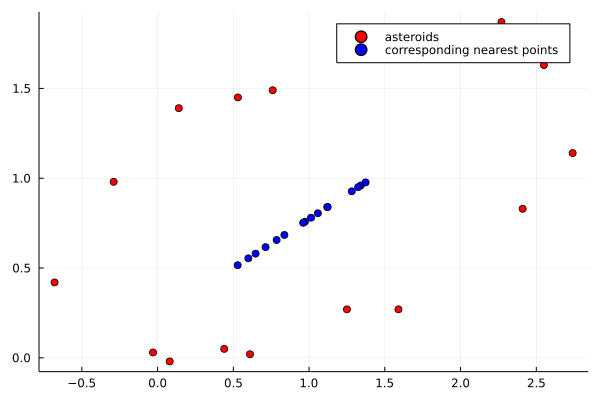

In [432]:
xhat=zeros(0,1)
yhat=zeros(0,1)
for i in 2:size(aa)[1]
    xhat=[xhat;fhat(para,aa[i,2],aa[i,3] )[1]]
    yhat=[yhat;fhat(para,aa[i,2],aa[i,3] )[2]]
end
scatter([aa[i,2] for i in 2:17],[aa[i,3] for i in 2:16],color="red",label="asteroids")
scatter!(xhat,yhat,color="blue",label="corresponding nearest points")

(c)

In [443]:
x=aa[2:17,2]
y=aa[2:17,3]
mass=aa[2:17,4]
t= atan.(x./y)
f(theta)=
mass.*(norm.(theta[1].+theta[3]*cos.(theta[5].+t).+theta[4]*cos.(theta[5].-t).-x).^2) .+
mass.*(norm.(theta[2].+theta[3]*sin.(theta[5].+t).+theta[4]*sin.(theta[5].-t).-y).^2) .+
1000*(abs(theta[1]-1)-1).+
1000*(abs(theta[2]-1)-1).+
1000*(abs(theta[3]-1)-1).+
1000*(abs(theta[4]-1)-1).+
1000*(abs(theta[5]-1)-1)
Df(theta)=
[ones(length(x)) ones(length(x)) cos.(theta[5].+t).+
    sin.(theta[5].+t) cos.(theta[5].-t).+sin.(theta[5].-t) theta[4]*
    (sin.(theta[5]).*sin.(t).+cos.(theta[5]).*cos.(t).-sin.(theta[5].-t)).+
    theta[3]*(cos.(t.+theta[5]).-sin.(t.+theta[5]))]

Df (generic function with 1 method)

weight : Mass

In [434]:
para=round.(levenberg_marquardt2(f, Df,[0.5,0.5,1,1,0.8], 1, 100, 1e-6)[1],digits=4)

5-element Vector{Float64}:
 2.1127
 2.1127
 2.2212
 2.2564
 0.7303

weight : Mass^2

In [435]:
mass=aa[2:17,4].^2
para=round.(levenberg_marquardt2(f, Df,[0.5,0.5,1,1,0.8], 1, 100, 1e-6)[1],digits=4)

5-element Vector{Float64}:
 2.0962
 2.0962
 2.1907
 2.2297
 0.725

weight : 1/Mass

In [436]:
mass=1 ./aa[2:17,4]
para=round.(levenberg_marquardt2(f, Df,[0.5,0.5,1,1,0.8], 1, 100, 1e-6)[1],digits=4)

5-element Vector{Float64}:
 2.112
 2.112
 2.2113
 2.2277
 0.7325

weight : 1/(Mass)^2

In [437]:
mass=1 ./aa[2:17,4].^2
para=round.(levenberg_marquardt2(f, Df,[0.5,0.5,1,1,0.8], 1, 100, 1e-6)[1],digits=4)

5-element Vector{Float64}:
 2.0216
 2.0216
 1.9943
 2.0249
 0.9674

(d)

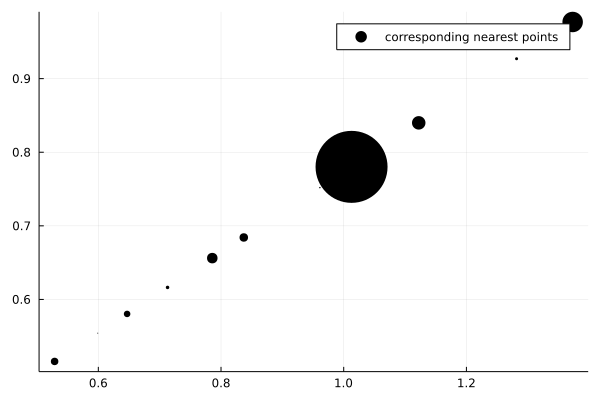

In [438]:
scatter(xhat,yhat,color="black",label="corresponding nearest points",markersize =aa[2:17,4]*5)

# problem3

(a)

In [173]:
function aug_L(f, Df, g, Dg, x1, lambda1, itmax = 100,feas_tol = 1e-5, oc_tol = 1e-5)
    x=x1
    z = zeros(length(g(x)))
    u=1
    resid=zeros(0,1)
    for i=1:itmax
        Obj(x)=[f(x);sqrt(u)*(g(x) + z/(2*u))]
        Dobj(x)=[Df(x);sqrt(u)*Dg(x)]
        x_per=x
        x =levenberg_marquardt2(Obj, Dobj, x , lambda1, 100, 1e-6)[1]
        z = z + 2*u*g(x)
        resid=vcat(resid,levenberg_marquardt2(Obj, Dobj, x, lambda1 , 100, 1e-6)[2])
        if norm(g(x))< feas_tol
            break
        end
        
        if norm(g(x)) < 0.25*norm(g(x_per))
            u=2*u
        end
        
    end
    return x,resid
end

aug_L (generic function with 4 methods)

In [174]:
f(x)= [(x[1]-1)^2+(x[2]-2)^2+(x[3]-3)^2]
Df(x)=[2*(x[1])-2  2*(x[2])-4  2*(x[3])-6]
g(x)=[0.25*(x[1])^2+x[1]-2*(x[2])^2+x[2]-2*x[1]*x[3]+x[3]-2]
Dg(x)=[0.25*x[1]-2*x[3]+1  -4*x[2]+1  -2*x[1]+1]
x,r = aug_L(f, Df, g, Dg, [0, 0, 0], 1.0, 100,1e-5,1e-5);
x

3-element Vector{Float64}:
 -0.09683237544461197
  1.2235395100141229
  3.2379654878695043

In [175]:
ral=zeros(1,0)
for i = 1:length(r)
    ral=hcat(ral,r[i]["residuals"][1])
end
temp=collect(1:length(ral))
ral=vcat(temp',ral)
ral

2×6 Matrix{Float64}:
 1.0      2.0      3.0       4.0        5.0         6.0
 8.29382  1.46909  0.299403  0.0327535  0.00243034  0.00114807

(b)

In [176]:
function penalty_method(f, Df, g, Dg, x1, lambda1, itmax = 100, feas_tol = 1e-5, oc_tol = 1e-5)
    x=x1
    u=1
    resid=zeros(0,1)
    for i=1:itmax
        Obj(x)=[f(x);sqrt(u)*g(x)]
        Dobj(x)=[Df(x);sqrt(u)*Dg(x)]
        x =levenberg_marquardt2(Obj, Dobj, x, lambda1, 100, 1e-6)[1]
        resid=vcat(resid,levenberg_marquardt2(Obj, Dobj, x, lambda1, 100, 1e-6)[2])
        if norm(g(x))< feas_tol
            break
        end
        u=2*u
    end
    return x ,resid
end

penalty_method (generic function with 4 methods)

In [177]:
f(x)= [(x[1]-1)^2+(x[2]-2)^2+(x[3]-3)^2]
Df(x)=[2*(x[1])-2  2*(x[2])-4  2*(x[3])-6]
g(x)=[0.25*(x[1])^2+x[1]-2*(x[2])^2+x[2]-2*x[1]*x[3]+x[3]-2]
Dg(x)=[0.25*x[1]-2*x[3]+1  -4*x[2]+1  -2*x[1]+1]
x ,r2 = penalty_method(f, Df, g, Dg, [0, 0, 0], 1.0);
x

3-element Vector{Float64}:
 -0.09689778967461112
  1.2236303899976726
  3.2379556148487767

In [178]:
rpen=zeros(1,0)
for i = 1:length(r2)
    rpen=hcat(rpen,r2[i]["residuals"][1])
end
temp=collect(1:length(rpen))
rpen=vcat(temp',rpen)
rpen

2×18 Matrix{Float64}:
 1.0          2.0         3.0         4.0        …  17.0         18.0
 0.000852815  0.00183606  0.00174427  0.0135358      0.00378677   0.00242641

(c)

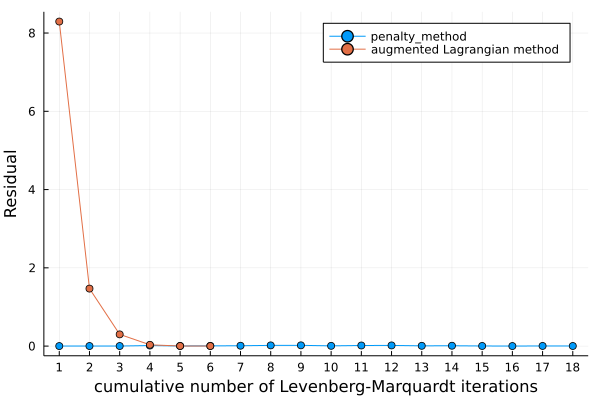

In [179]:
plot(rpen[1,:],rpen[2,:],label = "penalty_method",shape = :circle
    ,xlabel="cumulative number of Levenberg-Marquardt iterations"
 ,xticks =collect(1:length(rpen)),ylabel = "Residual")
plot!(ral[1,:],ral[2,:],label = "augmented Lagrangian method",shape = :circle)

# problem4

In [77]:
nn = readdlm("D:\\OneDrive - g.ntu.edu.tw\\110\\商管機器學習\\Assignment 5\\neural_data.csv", 
    ',')

201×3 Matrix{Any}:
   "X1"        "X2"         "Y"
  0.279043    0.126064    -1.44788
 -0.0220374   2.68522    -55.9334
 -1.04391     0.427573     0.0659059
  1.36861    -0.320083     0.227842
 -0.437704    1.35463     -3.20183
 -1.70875     0.951143     1.38691
 -0.0526326  -0.338184    -2.09956
  0.179231    1.45731     -7.38243
 -2.12533    -0.0569483    0.712194
 -1.25753    -1.72143      0.0409746
  0.368887    2.3094     -10.0409
  1.0803     -0.950944     0.0298426
  ⋮                      
 -1.39267    -0.122284     0.293098
 -0.523617    0.237671    -0.820578
 -1.43666     1.41678      1.49415
 -1.85914    -1.26998      0.17415
 -0.101538   -1.31034     -0.616955
 -0.951278   -1.24845     -0.0143327
 -0.0734638  -0.623002    -1.40034
 -0.269781   -1.88811     -0.198301
 -2.12379    -0.349227     0.531185
 -0.414947   -0.084857    -0.808044
 -0.167814    0.053894    -1.88373
 -0.535095    0.754682    -1.33

In [78]:
X=nn[2:end,1:2]
Y=nn[2:end,3]
X = Matrix{Float64}(X)
Y = Vector{Float64}(Y)

200-element Vector{Float64}:
  -1.447876309
 -55.93338206
   0.065905899
   0.227842029
  -3.20182568
   1.386914
  -2.099560086
  -7.38242566
   0.712193718
   0.040974551
 -10.04087916
   0.02984265
  -0.120633002
   ⋮
   0.293098305
  -0.820577577
   1.4941541
   0.17415039
  -0.616954999
  -0.014332744
  -1.400343299
  -0.198301265
   0.531184818
  -0.808043841
  -1.883733511
  -1.329995969

(a)

In [199]:
sigmoid(x)=(exp.(x)-exp.(-x))./(exp.(x)+exp.(-x))

R(theta) = (theta[1]*sigmoid(theta[2]*X[:,1]+theta[3]*X[:,2].+theta[4])+
theta[5]*sigmoid(theta[6]*X[:,1]+theta[7]*X[:,2].+theta[8])+
theta[9]*sigmoid(theta[10]*X[:,1]+theta[11]*X[:,2].+theta[12]).+theta[13]).-Y

f(theta) = R(theta).*R(theta) .+ 10^(-5)*norm(theta)

Ds(x)=4 ./((exp.(x)+exp.(-x)).*(exp.(x)+exp.(-x)))

Df(theta)=([ (sigmoid(theta[2]*X[:,1]+theta[3]*X[:,2].+theta[4]))';
(theta[1]*X[:,1].*Ds(theta[2]*X[:,1]+theta[3]*X[:,2].+theta[4]))';
(theta[1]*X[:,2].*Ds(theta[2]*X[:,1]+theta[3]*X[:,2].+theta[4]))';
(theta[1]*Ds(theta[2]*X[:,1]+theta[3]*X[:,2].+theta[4]))';
            (sigmoid(theta[6]*X[:,1]+theta[7]*X[:,2].+theta[8]))';
(theta[6]*X[:,1].*Ds(theta[6]*X[:,1]+theta[7]*X[:,2].+theta[8]))';
(theta[7]*X[:,2].*Ds(theta[6]*X[:,1]+theta[7]*X[:,2].+theta[8]))';
(theta[8]*Ds(theta[6]*X[:,1]+theta[7]*X[:,2].+theta[8]))';
            (sigmoid(theta[10]*X[:,1]+theta[11]*X[:,2].+theta[12]))';
(theta[10]*X[:,1].*Ds(theta[10]*X[:,1]+theta[11]*X[:,2].+theta[12]))';
(theta[10]*X[:,2].*Ds(theta[10]*X[:,1]+theta[11]*X[:,2].+theta[12]))';
(theta[10]*Ds(theta[10]*X[:,1]+theta[11]*X[:,2].+theta[12]))';
    (ones(200))'])'

Df (generic function with 1 method)

In [200]:
function levenberg_marquardt3(f, Df, x1, lambda1, kmax=100, tol=1e-6)
    n = length(x1)
    x = x1
    lambda = lambda1
    grad = zeros(0,1)
    objectives = zeros(0,1)
    residuals = zeros(0,1)
    for k = 1:kmax
        fk = f(x)
        Dfk = Df(x)
        grad=[grad; norm(Dfk)]
        objectives = [objectives; norm(fk)^2]
        residuals = [residuals; norm(2*Dfk'*fk)]
        if norm(2*Dfk'*fk) < tol
            break
        end;
        xt = x - inv(Dfk'*Dfk+lambda*Matrix{Float64}(I, n, n))*Dfk'*fk
        if norm(f(xt)) < norm(fk)
            lambda = 0.8*lambda
            x = xt
        else
            lambda = 2.0*lambda
        end
    end
    return x, Dict([ ("objectives", objectives),("residuals", residuals)]) , grad
end

levenberg_marquardt3 (generic function with 3 methods)

In [201]:
levenberg_marquardt3(f, Df,  [1,1,1,1,1,1,1,1,1,1,1,1,1] , 1, 100, 1e-6)[1]

13-element Vector{Float64}:
 -28.98511462787217
  -4.903723361093054
   1.3624216035648407
  19.640313614478004
 -25.914721797784388
   0.3190310408701957
   0.07616897951610027
  -1.8090161840328576
 -25.896737435540334
   0.3249813349114049
  -0.004538803747267779
  -2.3478438966102044
 -34.22653138330419

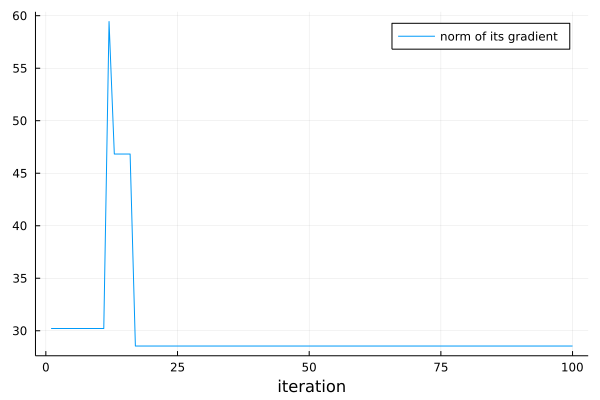

In [202]:
plot(levenberg_marquardt3(f, Df,  [1,1,1,1,1,1,1,1,1,1,1,1,1], 1, 100, 1e-6)[3],
    label="norm of its gradient",xlabel="iteration")

In [203]:
resi=[ R(levenberg_marquardt3(f, Df,  [1,1,1,1,1,1,1,1,1,1,1,1,1] , 1, 100, 1e-6)[1])]
println("RMS fitting error: ",sqrt(resi'*resi/length(resi[1])))

RMS fitting error: 12.905522381677217


(b)

In [204]:
levenberg_marquardt3(f, Df,  [-30,-4,1,20,-25,1,1,-1,-25,1,1,-2,-40] , 1, 100, 1e-6)[1]

13-element Vector{Float64}:
 -31.59907922834779
  -3.9999121648611595
   0.9999634667347372
  20.00002752851876
 -25.564770196660994
   0.5202730603531838
   0.4423285965297574
  -0.2344438840509152
 -24.646656187611246
   0.19681135932912408
  -0.05585457410495498
  -2.9736915583005605
 -41.59907968716003

In [205]:
resi=[ R(levenberg_marquardt3(f, Df,  [-30,-4,1,20,-25,1,1,-1,-25,1,1,-2,-40] , 1, 100, 1e-6)[1])]
println("RMS fitting error: ",sqrt(resi'*resi/length(resi[1])))

RMS fitting error: 44.77040414726762


In [207]:
levenberg_marquardt3(f, Df,  [0,0,0,0,0,0,0,0,0,0,0,0,0] , 1, 100, 1e-6)[1]

13-element Vector{Float64}:
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
 -11.059805453321122

In [208]:
resi=[ R(levenberg_marquardt3(f, Df, [0,0,0,0,0,0,0,0,0,0,0,0,0] , 1, 100, 1e-6)[1])]
println("RMS fitting error: ",sqrt(resi'*resi/length(resi[1])))

RMS fitting error: 10.595109837588124


In [209]:
levenberg_marquardt3(f, Df,  [1,2,3,4,5,6,7,8,9,10,11,12,13] , 1, 100, 1e-6)[1]

13-element Vector{Float64}:
 -8.432579801196669
  1.024190888029044
  1.7185785494343173
  5.046530441470308
 -4.354033714088779
  6.252331643342226
  7.181656991106613
  7.502589811659347
 -0.3183884379555309
 10.545398833297947
 11.058838263383567
 11.482046147119368
  2.4231214796822087

In [210]:
resi=[ R(levenberg_marquardt3(f, Df,  [1,2,3,4,5,6,7,8,9,10,11,12,13] , 1, 100, 1e-6)[1])]
println("RMS fitting error: ",sqrt(resi'*resi/length(resi[1])))

RMS fitting error: 9.020464827062623


(c)

In [156]:
X=nn[2:end,1:2]
b=nn[2:end,3]
X = Matrix{Float64}(X)
b = Vector{Float64}(b)
beta=inv(X'*X)*X'*b

2-element Vector{Float64}:
 -0.1391616440984559
 -1.9938467348322682

In [180]:
rms=sqrt((X*beta-b)'*(X*beta-b)/length(X*beta))
println("RMS fitting error: ", rms)

RMS fitting error: 4.5812954438036515
